**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc, roc_curve, r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Input**

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ML/Machine-Learning-Landslide-Prediction-main/Landslide_dataset.csv")
data.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318


**Data Analysis/Cleaning**

In [ ]:
# Check for missing values
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [ ]:

X = data.drop(['Landslide'], axis=1)
y = data['Landslide']

print(X, y)


          Aspect  Curvature  Earthquake  Elevation      Flow  Lithology  \
0       2.000000   3.333333    1.666667   4.000000  2.666667   2.333333   
1       4.000000   2.666667    2.333333   2.000000  2.333333   1.666667   
2       3.000000   2.666667    3.000000   2.000000  2.000000   2.000000   
3       3.000000   2.666667    2.666667   2.666667  3.000000   1.333333   
4       2.666667   3.666667    2.333333   3.666667  1.666667   3.666667   
...          ...        ...         ...        ...       ...        ...   
190885  2.333333   2.666667    2.000000   4.666667  2.333333   3.000000   
190886  3.000000   3.000000    2.333333   3.000000  3.000000   1.666667   
190887  3.000000   3.000000    2.000000   1.333333  2.333333   1.666667   
190888  3.333333   4.000000    2.666667   3.000000  2.000000   2.333333   
190889  3.666667   4.000000    2.000000   2.333333  2.333333   2.000000   

            NDVI      NDWI      Plan  Precipitation   Profile     Slope  \
0       3.000000  2.6666

**Evaluating a Gradient Boosting Classifier on an undersampled dataset, including visualizations of performance metrics and error calculations.**

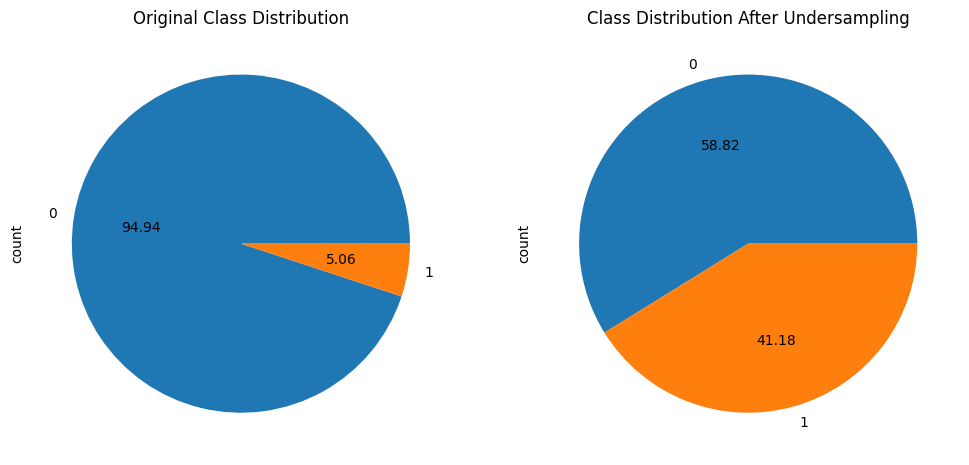

Accuracy: 0.9923224568138196


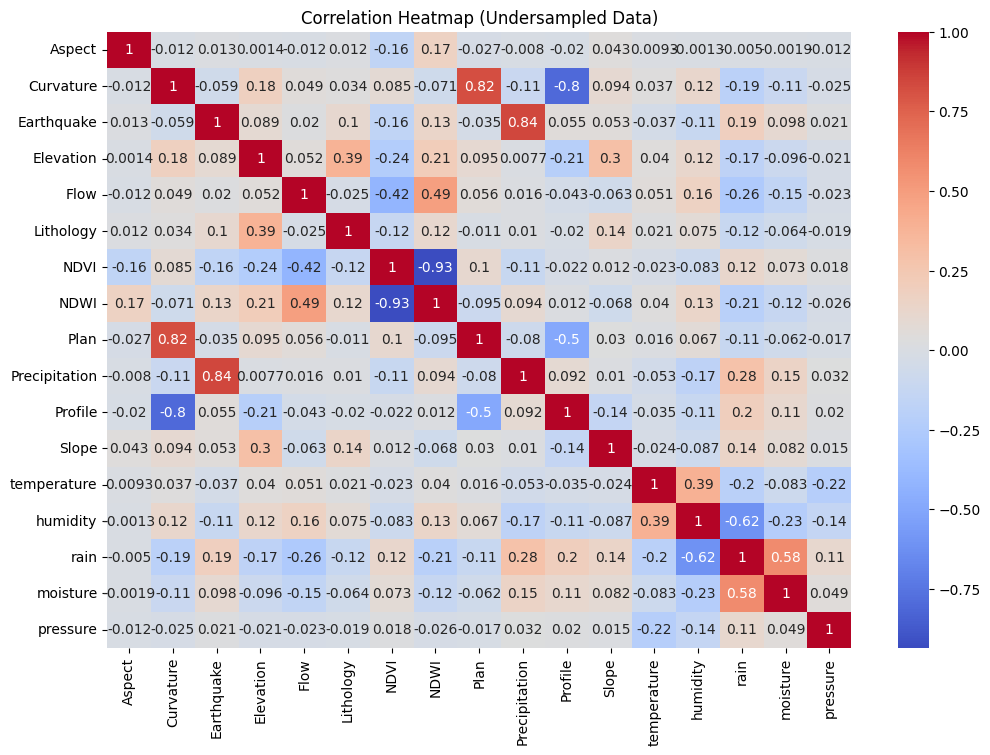

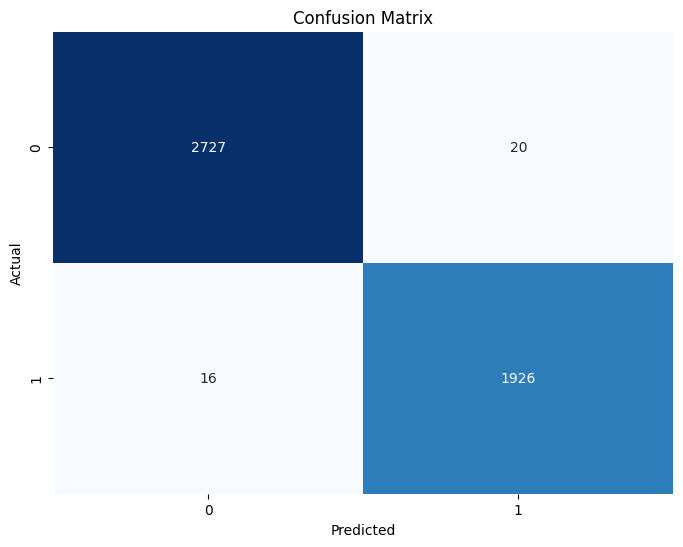

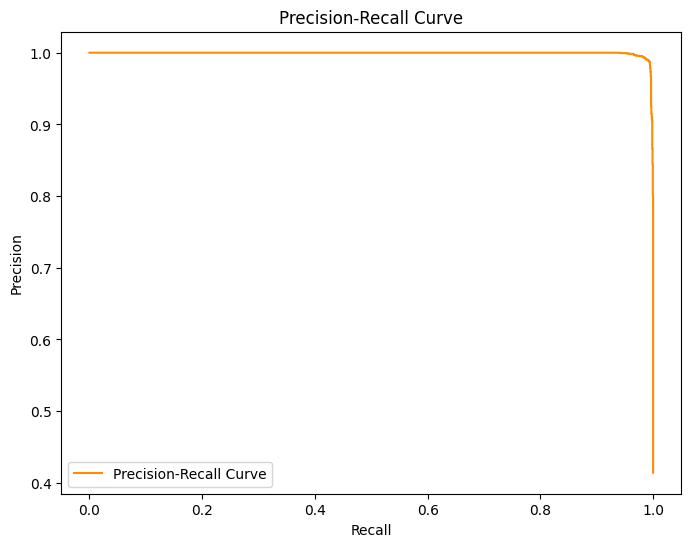

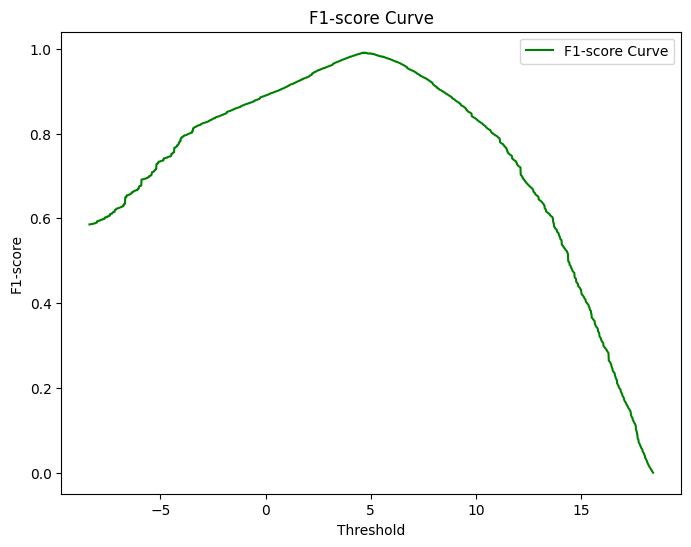

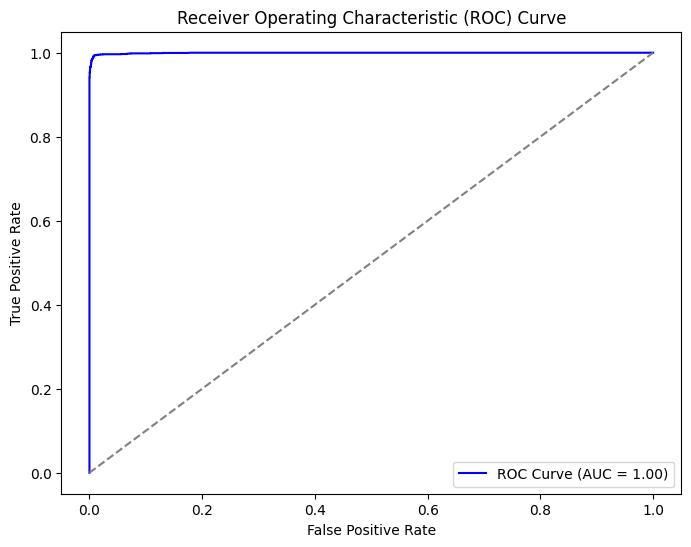

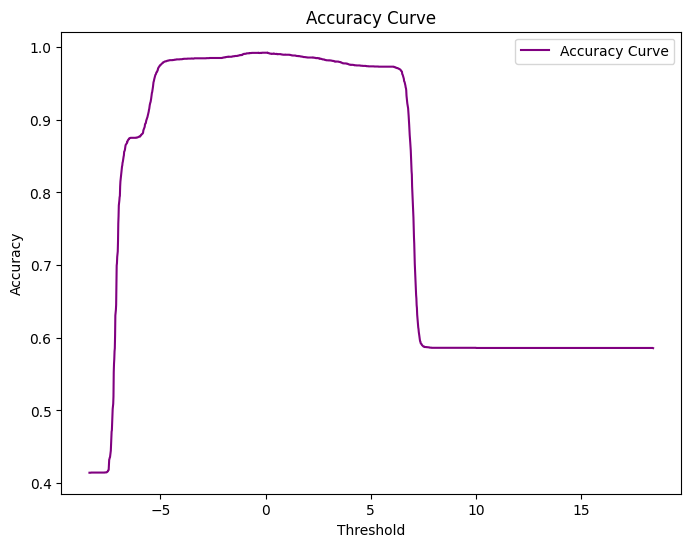

R2 score of our model is: 0.9683572042077923
Mean Squared Error of our model is: 0.007677543186180422
Accuracy on Test Set: 0.9971711456859972
Precision on Test Set: 0.984970477724101
Recall on Test Set: 0.95822454308094
F1-score on Test Set: 0.9714134462678665


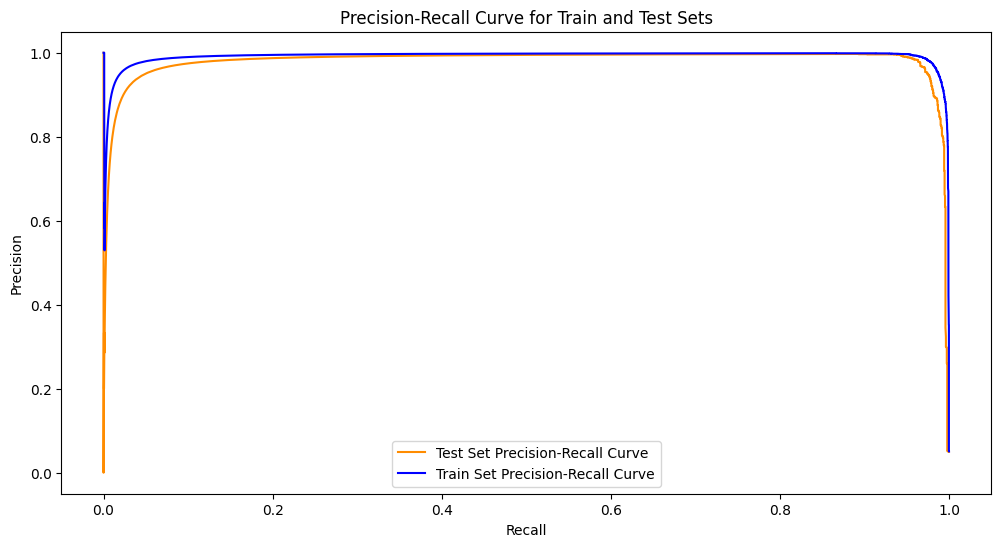

In [ ]:

# Checking different class numbers in the target variable
plt.figure(figsize=(12, 6))

# Subplot 1 - Original Class Distribution
plt.subplot(1, 2, 1)
y.value_counts().plot.pie(autopct='%.2f')
plt.title('Original Class Distribution')

# Subplot 2 - Class Distribution After Undersampling
plt.subplot(1, 2, 2)
rus = RandomUnderSampler(sampling_strategy=0.7)
X_resampled, y_resampled = rus.fit_resample(X, y)
y_resampled.value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution After Undersampling')

plt.show()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Creating and training the Gradient Boosting Classifier on the undersampled data
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Correlation heatmap with undersampled data
numeric_data_undersampled = pd.DataFrame(X_resampled, columns=X.columns).select_dtypes(include=[np.number])
corr_undersampled = numeric_data_undersampled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_undersampled, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Undersampled Data)')
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gb_classifier.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# F1-score Curve
f1_scores = 2 * (precision * recall) / (precision + recall)

# Define thresholds here
thresholds = np.linspace(
    min(gb_classifier.decision_function(X_test)),
    max(gb_classifier.decision_function(X_test)),
    len(f1_scores)
)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score Curve', color='green')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_classifier.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Accuracy Curve
accuracies = [accuracy_score(y_test, gb_classifier.decision_function(X_test) > threshold) for threshold in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies, label='Accuracy Curve', color='purple')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Error calculation
gb_y_pred = gb_classifier.predict(X_test)
print("R2 score of our model is:", r2_score(y_test, gb_y_pred))
print("Mean Squared Error of our model is:", mean_squared_error(y_test, gb_y_pred))

# Show Train-Test Curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Classifier on the training data
gb_classifier_train = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_train.fit(X_train, y_train)

# Making predictions on the test set
y_pred_train = gb_classifier_train.predict(X_test)

#Evaluating the model performance on the test set
accuracy_train = accuracy_score(y_test, y_pred_train)
print(f"Accuracy on Test Set: {accuracy_train}")

# Precision, Recall, and F1-score on the test set
precision_test = precision_score(y_test, y_pred_train)
recall_test = recall_score(y_test, y_pred_train)
f1_test = f1_score(y_test, y_pred_train)

print("Precision on Test Set:", precision_test)
print("Recall on Test Set:", recall_test)
print("F1-score on Test Set:", f1_test)

# Visualize Precision-Recall Curve for Train and Test Sets
precision_test, recall_test, _ = precision_recall_curve(y_test, gb_classifier_train.decision_function(X_test))
precision_train, recall_train, _ = precision_recall_curve(y_train, gb_classifier_train.decision_function(X_train))

plt.figure(figsize=(12, 6))

# Test set Precision-Recall curve
plt.plot(recall_test, precision_test, label='Test Set Precision-Recall Curve', color='darkorange')

# Train set Precision-Recall curve
plt.plot(recall_train, precision_train, label='Train Set Precision-Recall Curve', color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Train and Test Sets')
plt.legend()
plt.show()


**Plotting Learning Curve for a Machine Learning Model using Scikit-learn**

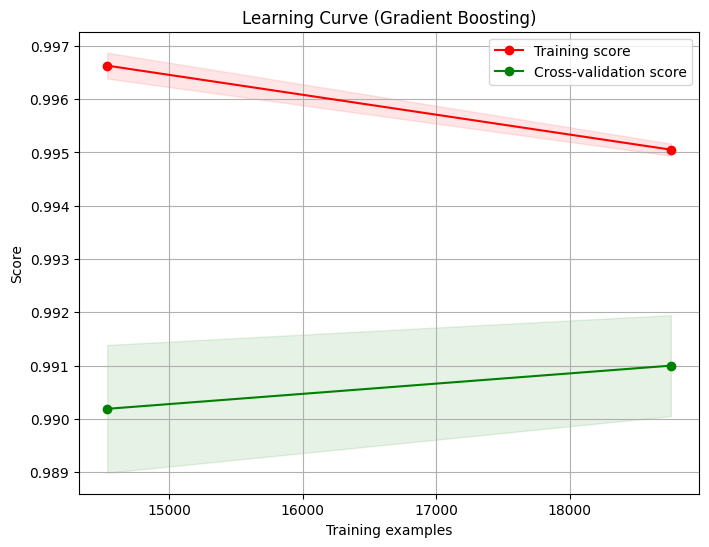

In [ ]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting the learning curve
plot_learning_curve(gb_classifier, "Learning Curve (Gradient Boosting)", X_resampled, y_resampled, cv=5, n_jobs=-1)
plt.show()
